In [1]:


# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [9]:
# Define the stock ticker symbol and date range
ticker = ["RELIANCE.NS", "TCS.NS", "INFY.NS"]  # Example: Apple Inc.
start_date = '2025-01-01'
end_date = '2025-06-23'

# Download historical stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows
data.head()


C:\Users\jaipr\AppData\Local\Temp\ipykernel_12784\3962189617.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


Price             Close                                   High               \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS  RELIANCE.NS   
Date                                                                          
2025-01-01  1856.380493  1221.250000  4012.260254  1866.685452  1226.300049   
2025-01-02  1930.685059  1241.800049  4074.018066  1935.418507  1244.449951   
2025-01-03  1911.850098  1251.150024  4000.015869  1925.853026  1262.050049   
2025-01-06  1910.962524  1218.000000  3995.235352  1945.624846  1262.000000   
2025-01-07  1904.059692  1240.849976  3930.160400  1931.375431  1244.500000   

Price                            Low                                   Open  \
Ticker           TCS.NS      INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS   
Date                                                                          
2025-01-01  4033.285050  1847.998430  1211.599976  3985.917806  1847.998430   
2025-01-02  4081.091438  1859.141753  1220.000000  3997.138026  1860.818117   
2025-01-03  4078.115933  1895.332502  1235.500000  3992.601167  1925.853026   
2025-01-06  4048.553843  1901.249216  1215.000000  3967.332025  1924.916219   
2025-01-07  4039.480625  1896.959640  1221.250000  3913.818473  1918.013387   

Price                                  Volume                       
Ticker      RELIANCE.NS       TCS.NS  INFY.NS RELIANCE.NS   TCS.NS  
Date                                                                
2025-01-01  1214.849976  3994.649713  1838368     5892590   763161  
2025-01-02  1221.250000  4019.626279  7083645    15486276  1720835  
2025-01-03  1243.900024  4078.115933  6218003    15521102  1791953  
2025-01-06  1253.949951  4005.479545  7164403    14816766  2085593  
2025-01-07  1222.000000  4014.699529  4294832    10070505  2669054

In [10]:
# Check the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Display summary statistics
data.describe()


Dataset contains 117 rows and 15 columns.


Price         Close                                   High               \
Ticker      INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS  RELIANCE.NS   
count    117.000000   117.000000   117.000000   117.000000   117.000000   
mean    1652.209797  1305.416238  3636.074308  1669.474994  1316.544019   
std      162.510601    90.275879   282.364630   164.972989    90.098648   
min     1377.370239  1161.900024  3203.030273  1386.393308  1171.250000   
25%     1543.088623  1238.849976  3432.887207  1560.937513  1245.449951   
50%     1604.327026  1269.150024  3515.800293  1614.188209  1280.199951   
75%     1817.675171  1413.699951  3930.160400  1837.151101  1424.400024   
max     1939.658691  1466.199951  4186.558105  1955.288883  1471.000000   

Price                        Low                                   Open  \
Ticker       TCS.NS      INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS   
count    117.000000   117.000000   117.000000   117.000000   117.000000   
mean    3672.943611  1634.727015  1292.766241  3604.223179  1651.690387   
std      288.255925   163.620684    90.848617   283.556086   165.416673   
min     3241.191062  1288.865511  1114.849976  3029.126153  1333.241141   
25%     3466.885010  1530.564707  1227.250000  3410.899902  1543.000000   
50%     3552.424792  1577.500000  1251.300049  3479.572360  1590.225324   
75%     4016.301735  1799.579744  1403.400024  3919.867398  1819.400793   
max     4217.632255  1921.957806  1447.300049  4124.409807  1941.532411   

Price                                   Volume                              
Ticker  RELIANCE.NS       TCS.NS       INFY.NS   RELIANCE.NS        TCS.NS  
count    117.000000   117.000000  1.170000e+02  1.170000e+02  1.170000e+02  
mean    1304.121365  3639.280576  7.345767e+06  1.230686e+07  2.528415e+06  
std       90.546358   288.050432  3.342442e+06  5.530493e+06  1.288057e+06  
min     1132.199951  3072.688904  0.000000e+00  0.000000e+00  0.000000e+00  
25%     1238.000000  3440.000000  4.996744e+06  8.511216e+06  1.721761e+06  
50%     1267.000000  3518.724395  7.083645e+06  1.125263e+07  2.284536e+06  
75%     1414.000000  3982.997729  8.609500e+06  1.443101e+07  2.847013e+06  
max     1457.000000  4197.192267  2.171525e+07  3.253897e+07  7.894300e+06

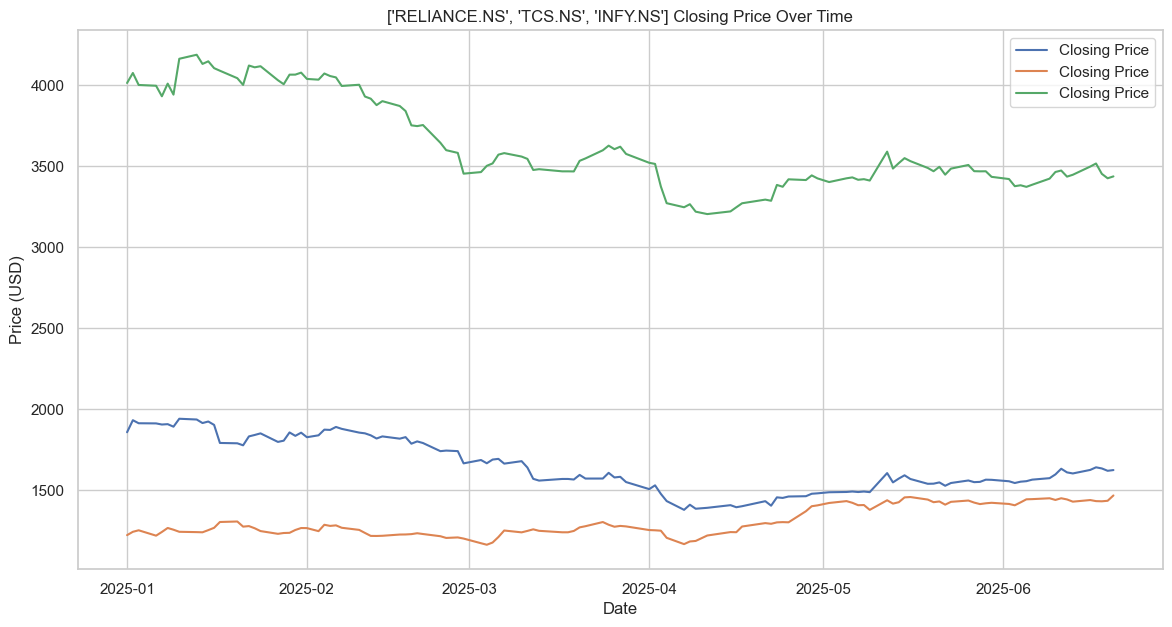

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.title(f'{ticker} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


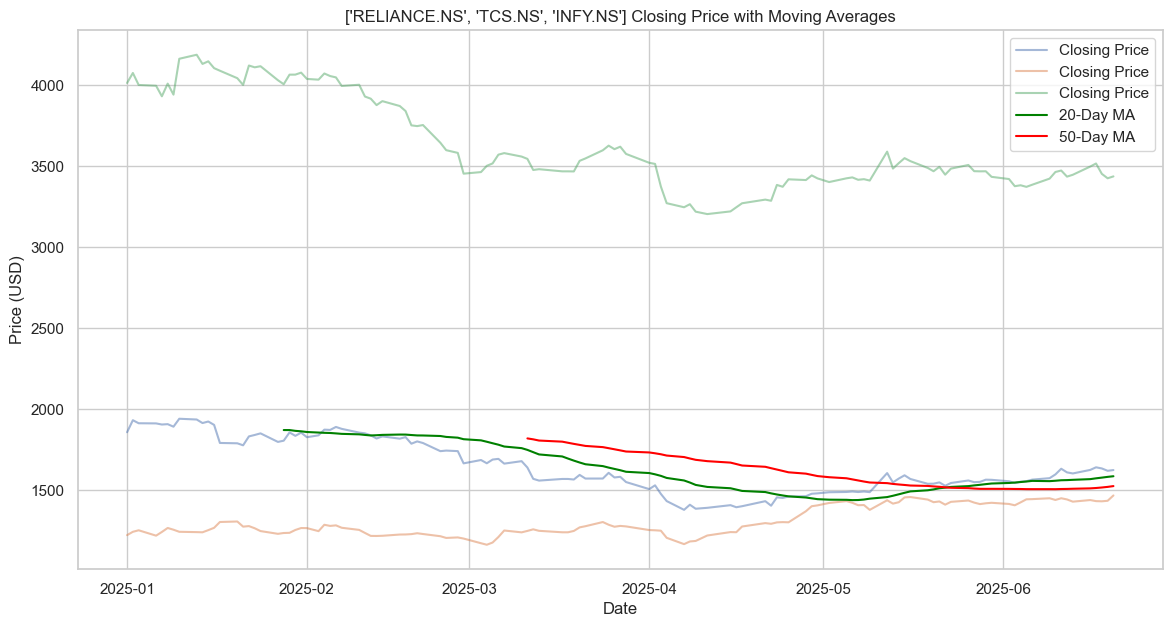

In [14]:
# Calculate moving averages
data['MA20'] = data['Close']['INFY.NS'].rolling(window=20).mean()
data['MA50'] = data['Close']['INFY.NS'].rolling(window=50).mean()

# Plot closing price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price', alpha=0.5)
plt.plot(data['MA20'], label='20-Day MA', color='green')
plt.plot(data['MA50'], label='50-Day MA', color='red')
plt.title(f'{ticker} Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


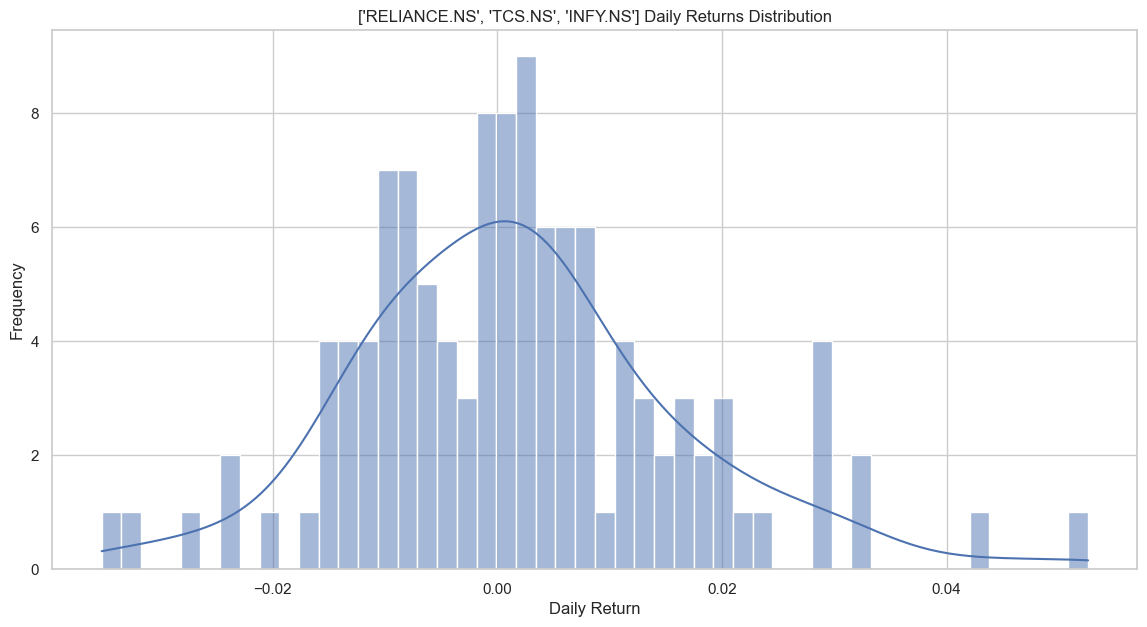

In [16]:
# Calculate daily returns
data['Daily Return'] = data['Close']['RELIANCE.NS'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 7))
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True)
plt.title(f'{ticker} Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


C:\Users\jaipr\AppData\Local\Temp\ipykernel_12784\1077522085.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_multi = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed


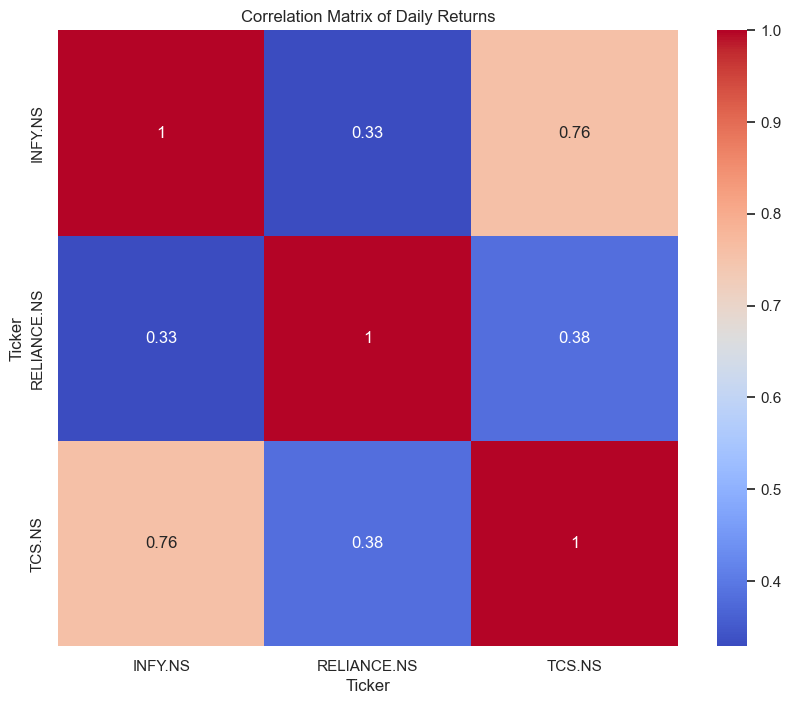

In [19]:
# Example with multiple tickers
ticker = ["RELIANCE.NS", "TCS.NS", "INFY.NS"]  # Example: Apple Inc.
data_multi = yf.download(ticker, start=start_date, end=end_date)['Close']

# Calculate daily returns
returns = data_multi.pct_change()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Returns')
plt.show()
